#libraries used

In [118]:
import pandas as pd
import glob
import os

#Finding all quant.sf files

In [ ]:
files = glob.glob("*/quant.sf")
print(files)
count_dict = {}

['sample3_quant/quant.sf', 'sample1_quant/quant.sf', 'sample2_quant/quant.sf', 'sample4_quant/quant.sf']


#Making the count_matrix table

In [120]:
for f in files:
    sample = os.path.basename(os.path.dirname(f))
    df = pd.read_csv(f, sep="\t")
    count_dict[sample] = df["NumReads"].values


import numpy as np

count_df = pd.DataFrame(count_dict)
gene_ids = pd.read_csv("ALLgene_ids.csv", sep="\t")["Name"]
gene_ids

count_df.insert(0, "Gene_ID", gene_ids)
count_df.columns = ["Gene_ID", "sample1", "sample2", "sample3", "sample4"]   

count_df = count_df.set_index("Gene_ID")
count_df = count_df.groupby("Gene_ID").sum()

numeric_cols = ["sample1", "sample2", "sample3", "sample4"]
count_df = count_df[count_df[numeric_cols].sum(axis = 1) > 0]

count_df = count_df.T
count_df




Gene_ID,ENST00000000233.10,ENST00000000412,ENST00000000442.11,ENST00000001008,ENST00000001146,ENST00000002125,ENST00000002165.11,ENST00000002501.11,ENST00000002596,ENST00000002829,...,ENST00000972624,ENST00000972626,ENST00000972639,ENST00000972640,ENST00000972641,ENST00000972650,ENST00000972661,ENST00000972668,ENST00000972670,ENST00000972671
sample1,2852.653,5231.628,0.000,30.159,706.472,454.792,453.920,51.865,0.0,111.375,...,0.000,0.000,114.676,19.212,0.000,0.000,0.000,0.000,731.509,75.965
sample2,933.122,7069.352,0.000,40.869,211.259,560.897,869.612,23.085,0.0,13.168,...,0.000,0.000,61.428,98.452,0.000,0.000,0.000,5.412,201.545,176.431
sample3,0.000,3263.168,0.000,4.385,0.000,538.249,1613.300,14.094,2.0,0.000,...,0.000,24.942,41.136,15.926,0.000,0.000,0.000,0.000,13.900,37.744
sample4,4021.881,3324.502,158.382,10.370,61.000,206.544,366.736,79.859,0.0,270.670,...,45.043,0.000,50.185,40.206,4.571,9.027,8.908,0.000,2383.968,40.344


#Building the metadata

In [121]:
metadata_dict = {
    "sample" : ["sample1", "sample2", "sample3", "sample4"],
    "condition" : ["control", "control", "treated", "treated"]
}


metadata = pd.DataFrame(metadata_dict)
metadata

,sample,condition
0,sample1,control
1,sample2,control
2,sample3,treated
3,sample4,treated


In [122]:
#Saving csv files

In [123]:
count_df.to_csv("counts_matrix.csv", index=False)
metadata.to_csv("metadata.csv",index=False)

#Rebuilding the table with gene_ids

#Merging 2 files

In [124]:
count_df = pd.read_csv("Counts_matrix2.csv", sep= ",")
count_df = count_df.reset_index().rename(columns={"Name" : "Gene_ID"})
if "index" in count_df.columns:
    count_df = count_df.drop(columns=["index"])

count_df

,Gene_ID,sample1,sample2,sample3,sample4
0,ENSG00000290825,0.000,0.000,0.00,0.000
1,ENSG00000290825,0.000,0.000,0.00,0.000
2,ENSG00000290825,0.000,0.000,0.00,0.000
3,ENSG00000290825,0.000,0.000,0.00,0.000
4,ENSG00000290825,0.000,0.000,0.00,0.000
...,...,...,...,...,...
517033,ENSG00000303902,38.307,76.627,25.87,3.874
517034,ENSG00000306528,0.000,0.000,0.00,0.000
517035,ENSG00000306528,0.000,0.000,0.00,0.000
517036,ENSG00000297844,0.000,0.000,0.00,0.000


In [125]:
count_df.to_csv("Final_Counts_matrix.csv", index=False)

#Aggregation

In [126]:
count_df = pd.read_csv('Final_Counts_matrix.csv', sep= ",")
count_df = count_df.groupby("Gene_ID").sum().reset_index()
count_df

,Gene_ID,sample1,sample2,sample3,sample4
0,ENSG00000000003,2801.999,4083.444,3757.734,1678.957
1,ENSG00000000005,0.000,0.000,0.000,1.000
2,ENSG00000000419,2158.044,2689.438,2302.335,1185.923
3,ENSG00000000457,1076.000,1243.920,1203.932,662.999
4,ENSG00000000460,234.000,365.241,303.010,160.000
...,...,...,...,...,...
82046,ENSG00000310589,0.000,0.000,0.000,0.000
82047,ENSG00000310590,0.000,0.000,0.000,0.000
82048,ENSG00000310591,0.000,0.000,0.000,0.000
82049,ENSG00000310592,5.618,21.051,15.597,0.000


In [127]:
count_df = count_df.set_index("Gene_ID")
count_df

,sample1,sample2,sample3,sample4
Gene_ID,,,,
ENSG00000000003,2801.999,4083.444,3757.734,1678.957
ENSG00000000005,0.000,0.000,0.000,1.000
ENSG00000000419,2158.044,2689.438,2302.335,1185.923
ENSG00000000457,1076.000,1243.920,1203.932,662.999
ENSG00000000460,234.000,365.241,303.010,160.000
...,...,...,...,...
ENSG00000310589,0.000,0.000,0.000,0.000
ENSG00000310590,0.000,0.000,0.000,0.000
ENSG00000310591,0.000,0.000,0.000,0.000


In [128]:
count_df = count_df[count_df[numeric_cols].sum(axis = 1) > 0]
numeric_cols = ["sample1", "sample2", "sample3", "sample4"]
count_df

,sample1,sample2,sample3,sample4
Gene_ID,,,,
ENSG00000000003,2801.999,4083.444,3757.734,1678.957
ENSG00000000005,0.000,0.000,0.000,1.000
ENSG00000000419,2158.044,2689.438,2302.335,1185.923
ENSG00000000457,1076.000,1243.920,1203.932,662.999
ENSG00000000460,234.000,365.241,303.010,160.000
...,...,...,...,...
ENSG00000310577,7.678,18.897,7.203,1.929
ENSG00000310581,0.000,0.000,0.000,25.010
ENSG00000310583,19.331,17.995,12.325,0.000


In [129]:
count_df = count_df.T
count_df

Gene_ID,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,...,ENSG00000310537,ENSG00000310539,ENSG00000310560,ENSG00000310566,ENSG00000310576,ENSG00000310577,ENSG00000310581,ENSG00000310583,ENSG00000310586,ENSG00000310592
sample1,2801.999,0.0,2158.044,1076.000,234.000,0.0,12653.390,4697.306,2730.980,1840.000,...,40.516,0.000,212.000,10.018,92.292,7.678,0.00,19.331,0.000,5.618
sample2,4083.444,0.0,2689.438,1243.920,365.241,1.0,9451.849,6111.440,4255.595,2450.580,...,36.254,16.918,59.001,2.367,35.953,18.897,0.00,17.995,1.298,21.051
sample3,3757.734,0.0,2302.335,1203.932,303.010,0.0,37076.036,8442.016,2527.694,1935.164,...,26.808,69.252,13.000,0.000,0.000,7.203,0.00,12.325,0.000,15.597
sample4,1678.957,1.0,1185.923,662.999,160.000,1.0,15818.158,3567.443,1286.933,1025.059,...,88.801,9.540,226.000,1.000,171.233,1.929,25.01,0.000,0.000,0.000


In [130]:
metadata = metadata.set_index("sample")
metadata

,condition
sample,
sample1,control
sample2,control
sample3,treated
sample4,treated


#DE analysis

#Converting table values to int
#Creating the dds object
#deseq method

In [131]:
from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats

count_cols = count_df.columns
count_df[count_cols] = count_df[count_cols].astype(int)

dds = DeseqDataSet(counts = count_df, 
metadata = metadata,
design = "condition")


dds.deseq2()
type(dds)



Using None as control genes, passed at DeseqDataSet initialization


Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 1.82 seconds.

Fitting dispersion trend curve...
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/pydeseq2/dds.py:820: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.24 seconds.

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/pydeseq2/dds.py:548: UserWarning: As the residual degrees of freedom is less than 3, the distribution of log dispersions is especially asymmetric and likely to be poorly estimated by the MAD.
  self.fit_dispersion_prior()
Fitting MAP dispersions...
... done in 2.25 seconds.

Fitting LFCs...
... done in 2.13 seconds.

Calculating cook's distance...
... done in 0.00 seconds.

Replacing 0 outlier genes.



pydeseq2.dds.DeseqDataSet

In [132]:
stat_res = DeseqStats(dds, n_cpus=8, contrast=("condition", "control", "treated"))
stat_res.summary()



Running Wald tests...


Log2 fold change & Wald test p-value: condition control vs treated
                    baseMean  log2FoldChange     lfcSE      stat    pvalue  \
Gene_ID                                                                      
ENSG00000000003  3009.479986       -0.143075  0.921442 -0.155273  0.876606   
ENSG00000000005     0.309599       -1.973116  3.675358 -0.536850  0.591371   
ENSG00000000419  2024.960029       -0.010699  0.850904 -0.012573  0.989968   
ENSG00000000457  1027.324710       -0.172342  0.822506 -0.209532  0.834033   
ENSG00000000460   259.361397       -0.118710  0.886340 -0.133933  0.893456   
...                      ...             ...       ...       ...       ...   
ENSG00000310577     7.448382        1.166574  1.441671  0.809182  0.418411   
ENSG00000310581     7.739971       -6.655504  4.321701 -1.540020  0.123556   
ENSG00000310583    10.904949        1.145311  1.947607  0.588061  0.556492   
ENSG00000310586     0.203948        0.932806  3.657146  0.255064  0.798674 

... done in 0.63 seconds.



In [133]:
res = stat_res.results_df
res = res.reset_index()
res = res.rename(columns={"index" : "Gene_ID"})
res


,Gene_ID,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
0,ENSG00000000003,3009.479986,-0.143075,0.921442,-0.155273,0.876606,0.999979
1,ENSG00000000005,0.309599,-1.973116,3.675358,-0.536850,0.591371,NaN
2,ENSG00000000419,2024.960029,-0.010699,0.850904,-0.012573,0.989968,0.999979
3,ENSG00000000457,1027.324710,-0.172342,0.822506,-0.209532,0.834033,0.999979
4,ENSG00000000460,259.361397,-0.118710,0.886340,-0.133933,0.893456,0.999979
...,...,...,...,...,...,...,...
36192,ENSG00000310577,7.448382,1.166574,1.441671,0.809182,0.418411,0.999979
36193,ENSG00000310581,7.739971,-6.655504,4.321701,-1.540020,0.123556,0.999979
36194,ENSG00000310583,10.904949,1.145311,1.947607,0.588061,0.556492,0.999979
36195,ENSG00000310586,0.203948,0.932806,3.657146,0.255064,0.798674,NaN


#mapping gene 

In [134]:
gtf_map = pd.read_csv("gtf.mapping.csv", sep= " ", names=["Gene_ID", "Gene_Symbol"])
res = res.drop(columns=[c for c in res.columns if "Gene_Symbol" in c], errors="ignore")


res = res.reset_index()
res = res.merge(gtf_map, on="Gene_ID", how="left")
res= res.set_index("Gene_ID")
res


,index,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Gene_Symbol
Gene_ID,,,,,,,,
ENSG00000000003,0,3009.479986,-0.143075,0.921442,-0.155273,0.876606,0.999979,TSPAN6
ENSG00000000005,1,0.309599,-1.973116,3.675358,-0.536850,0.591371,NaN,TNMD
ENSG00000000419,2,2024.960029,-0.010699,0.850904,-0.012573,0.989968,0.999979,DPM1
ENSG00000000457,3,1027.324710,-0.172342,0.822506,-0.209532,0.834033,0.999979,SCYL3
ENSG00000000460,4,259.361397,-0.118710,0.886340,-0.133933,0.893456,0.999979,FIRRM
...,...,...,...,...,...,...,...,...
ENSG00000310577,36192,7.448382,1.166574,1.441671,0.809182,0.418411,0.999979,ENSG00000310577
ENSG00000310581,36193,7.739971,-6.655504,4.321701,-1.540020,0.123556,0.999979,ENSG00000310581
ENSG00000310583,36194,10.904949,1.145311,1.947607,0.588061,0.556492,0.999979,ENSG00000310583


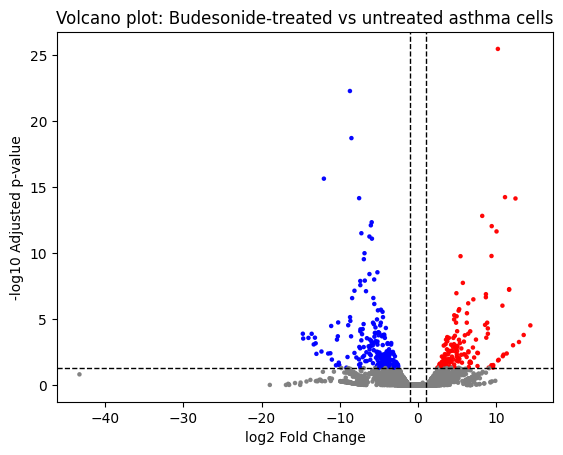

                 index       baseMean  log2FoldChange     lfcSE       stat  \
Gene_ID                                                                      
ENSG00000129824   5683    5284.871921       10.214442  0.890234  11.473882   
ENSG00000114374   3975    1971.059874       11.126981  1.266199   8.787704   
ENSG00000067048    946    3339.997062       12.464585  1.428852   8.723494   
ENSG00000158258   9324    2861.204070        8.214005  0.982875   8.357122   
ENSG00000277656  26653     814.476370        9.426466  1.163099   8.104615   
ENSG00000165246  10515    1233.233432       10.042455  1.258322   7.980828   
ENSG00000198692  15307     603.240833        9.399470  1.272356   7.387453   
ENSG00000096696   1950    1992.067296        5.439030  0.737468   7.375281   
ENSG00000115468   4123     481.217142        5.738220  0.859084   6.679466   
ENSG00000012817    301     948.578333       11.654685  1.791762   6.504593   
ENSG00000067646    969     947.318527       11.652839  1.796976 

,index,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Gene_Symbol
Gene_ID,,,,,,,,
ENSG00000147257,8211,5215.484005,-8.700269,0.808830,-10.756613,5.516058e-27,5.315825e-23,GPC3
ENSG00000163710,10120,1827.194319,-8.507647,0.856746,-9.930183,3.076910e-23,1.976812e-19,PCOLCE2
ENSG00000229807,18255,3490.198609,-12.030077,1.312282,-9.167293,4.850448e-20,2.337189e-16,XIST
ENSG00000153707,8851,4002.900151,-7.523742,0.860117,-8.747346,2.184289e-18,7.016663e-15,PTPRD
ENSG00000266524,24282,6000.038337,-5.917726,0.720738,-8.210653,2.199897e-16,4.711202e-13,GDF10
ENSG00000121075,4772,1903.353910,-6.026196,0.740883,-8.133802,4.160318e-16,8.018596e-13,TBX4
ENSG00000125730,5246,6978.929223,-7.235357,0.912185,-7.931896,2.158248e-15,3.199851e-12,C3
ENSG00000175899,12524,97127.187009,-6.206814,0.790606,-7.850705,4.137045e-15,5.695529e-12,A2M
ENSG00000081803,1460,9951.618070,-5.887461,0.755230,-7.795589,6.410896e-15,8.237574e-12,CADPS2


In [135]:

volcano = res.copy()
volcano["sig"] = "NS"   

volcano["neg_log10_padj"] = -np.log10(volcano["padj"])
volcano.loc[(volcano["padj"] < 0.05) & (volcano["log2FoldChange"] > 1), "sig"] = "Up"
volcano.loc[(volcano["padj"] < 0.05) & (volcano["log2FoldChange"] < -1), "sig"] = "Down"

colors = {"NS": "grey", "Up": "red", "Down": "blue"}

plt.scatter(
    volcano["log2FoldChange"],
    volcano["neg_log10_padj"],
    c=volcano["sig"].map(colors),
    s=5,
    alpha=0.95
)

plt.axhline(-np.log10(0.05), color="black", linestyle="--", linewidth=1)
plt.axvline(1, color="black", linestyle="--", linewidth=1)
plt.axvline(-1, color="black", linestyle="--", linewidth=1)

plt.xlabel("log2 Fold Change")
plt.ylabel("-log10 Adjusted p-value")
plt.title("Volcano plot: Budesonide-treated vs untreated asthma cells")

plt.show()



import numpy as np
import matplotlib.pyplot as plt

#top 30 most diffrentially expressed genes
up = res[(res["log2FoldChange"]) > 2 & (res["padj"] < 0.05)]
down = res[(res["log2FoldChange"]) < -2 & (res["padj"] < 0.05)]

top30_up = up.sort_values("padj").head(30)
top30_down = down.sort_values("padj").head(30)
print(top30_up)
top30_down





In [136]:
top30_up


,index,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Gene_Symbol
Gene_ID,,,,,,,,
ENSG00000129824,5683,5284.871921,10.214442,0.890234,11.473882,1.784685e-30,3.439802e-26,RPS4Y1
ENSG00000114374,3975,1971.059874,11.126981,1.266199,8.787704,1.526470e-18,5.884237e-15,USP9Y
ENSG00000067048,946,3339.997062,12.464585,1.428852,8.723494,2.697464e-18,7.427275e-15,DDX3Y
ENSG00000158258,9324,2861.204070,8.214005,0.982875,8.357122,6.426670e-17,1.548345e-13,CLSTN2
ENSG00000277656,26653,814.476370,9.426466,1.163099,8.104615,5.291275e-16,9.271277e-13,GSTT1
ENSG00000165246,10515,1233.233432,10.042455,1.258322,7.980828,1.453549e-15,2.334641e-12,NLGN4Y
ENSG00000198692,15307,603.240833,9.399470,1.272356,7.387453,1.496679e-13,1.696882e-10,EIF1AY
ENSG00000096696,1950,1992.067296,5.439030,0.737468,7.375281,1.639991e-13,1.756066e-10,DSP
ENSG00000115468,4123,481.217142,5.738220,0.859084,6.679466,2.398146e-11,1.848874e-08,EFHD1


#heatmap plot

sample            sample1   sample2    sample3    sample4
Gene_ID                                                  
A2M              7.670185  8.022233  12.273144  12.040295
C3               4.458104  4.602272   9.110411   9.835459
CADPS2           5.733401  5.869967   9.747865  10.000141
CDO1             3.833446  3.712931   7.293069   8.000288
CHI3L2           4.989776  5.139816   9.155990   8.671006
CLDN23           3.067014  3.329382   6.527424   6.364009
CSNK2B           4.225456  4.168704   7.838922   7.712026
DCLK1            4.092231  4.130102   7.907651   7.287770
ENSG00000295063  0.000000  0.967585   5.843945   5.818911
EPHX2            1.811468  1.625105   5.089754   5.229821
GDF10            5.301599  5.256948   9.369223   9.383419
GPC3             3.248197  3.269170   9.401333   9.072158
IL13RA2          2.492551  3.063146   7.117309   6.996924
IL33             3.651760  3.692820   8.640698   7.609420
IRF4             0.995647  1.237612   5.800516   6.720807
NAP1L2        

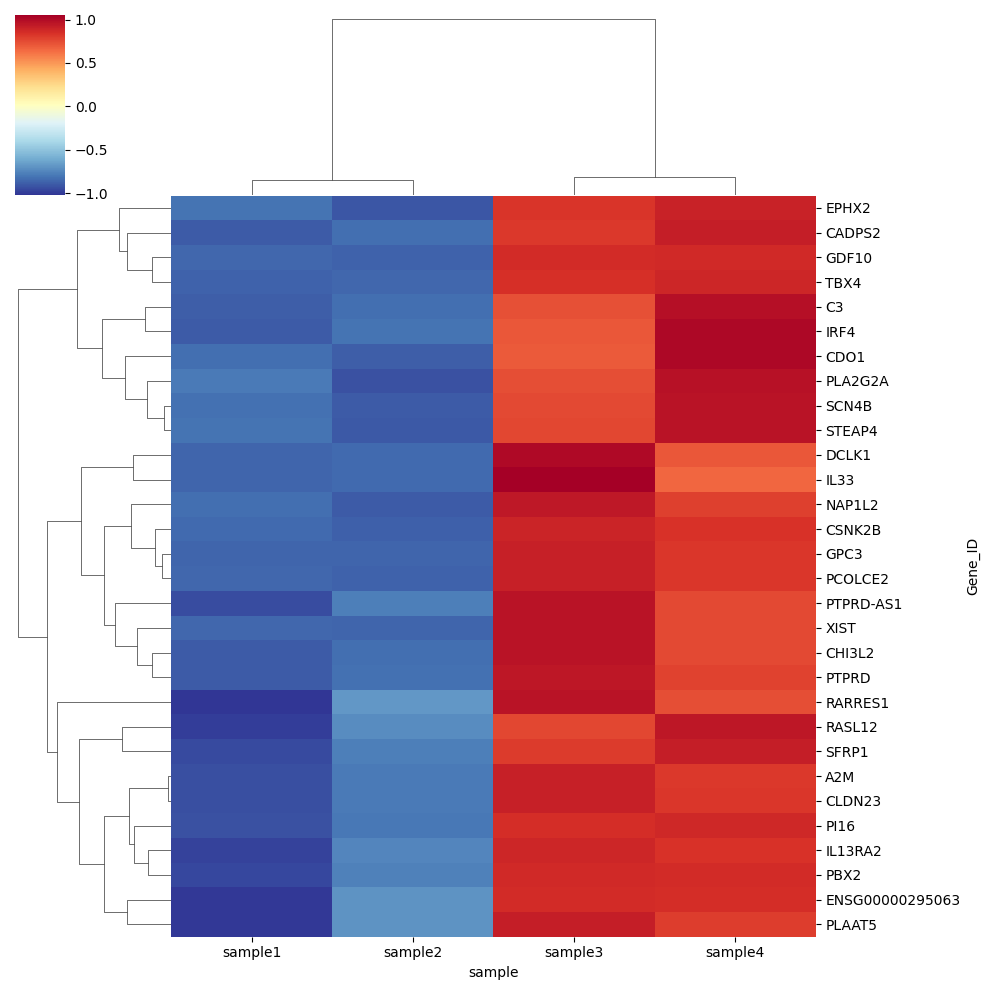

In [137]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


dds.layers["log1p"] = np.log1p(dds.layers["normed_counts"])
dds_down = dds[:, top30_down.index]
grapher = pd.DataFrame(dds_down.layers["log1p"].T, index=dds_down.var_names, columns=dds_down.obs_names)
id_to_symbol = top30_down["Gene_Symbol"]   
#print(id_to_symbol) 
grapher.index = grapher.index.map(id_to_symbol)

grapher = grapher.dropna(axis=0)                 # remove genes with no symbol
grapher = grapher.groupby(grapher.index).mean()  # merge duplicate symbols safely
grapher = grapher.loc[grapher.std(axis=1) > 0]

print(grapher)

sns.clustermap(grapher, z_score=0, cmap= "RdYlBu_r")





sample             sample1    sample2   sample3   sample4
Gene_ID                                                  
ADM2              6.843594   6.520506  3.551043  3.464482
ANKRD1            7.684413   7.757851  0.755334  2.389420
CASQ2             6.259927   6.976644  1.478182  0.000000
CLSTN2            8.408060   8.842955  3.294035  2.594057
COL15A1          11.031274  11.385197  7.805463  7.832464
DDX3Y             8.531617   9.022441  0.755334  0.805759
DSP               8.228406   8.305205  4.501335  4.515277
EFHD1             7.019959   6.649939  2.947232  2.908950
EIF1AY            6.938146   7.230202  0.755334  1.246110
ENSG00000275993   7.534842   7.922987  2.751632  3.846324
ENSG00000294171   7.918472   7.480370  3.806763  4.304948
FOXE1             6.827083   7.090253  1.478182  2.594057
GSTT1             7.535753   7.230793  1.180697  1.246110
HLA-A             8.481785   8.382230  0.000000  0.000000
IGFBP3           12.484868  13.177113  9.352822  9.224706
KDM5D         

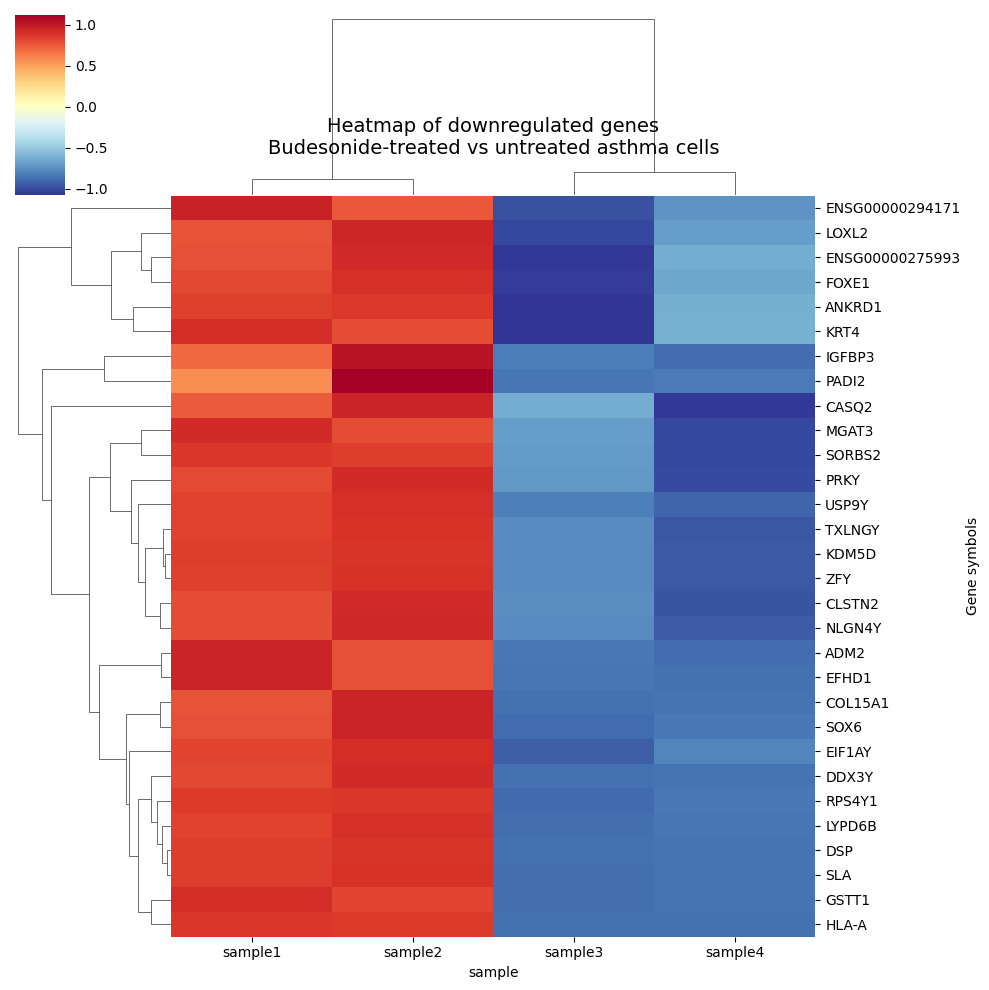

In [138]:
dds.layers["log1p"] = np.log1p(dds.layers["normed_counts"])
dds_up = dds[:, top30_up.index]
grapher = pd.DataFrame(dds_up.layers["log1p"].T, index=dds_up.var_names, columns=dds_down.obs_names)
id_to_symbol = top30_up["Gene_Symbol"]   
#print(id_to_symbol) 
grapher.index = grapher.index.map(id_to_symbol)

grapher = grapher.dropna(axis=0)                 # remove genes with no symbol
grapher = grapher.groupby(grapher.index).mean()  # merge duplicate symbols safely
grapher = grapher.loc[grapher.std(axis=1) > 0]

print(grapher)

g = sns.clustermap(grapher, z_score=0, cmap= "RdYlBu_r")

g.ax_heatmap.set_title(
    "Heatmap of downregulated genes\nBudesonide-treated vs untreated asthma cells",
    fontsize=14,
    pad=30
)

g.ax_heatmap.set_ylabel("Gene symbols")
g



                 index      baseMean  log2FoldChange     lfcSE       stat  \
Gene_ID                                                                     
ENSG00000129824   5683   5284.871921       10.214442  0.890234  11.473882   
ENSG00000147257   8211   5215.484005       -8.700269  0.808830 -10.756613   
ENSG00000163710  10120   1827.194319       -8.507647  0.856746  -9.930183   
ENSG00000229807  18255   3490.198609      -12.030077  1.312282  -9.167293   
ENSG00000114374   3975   1971.059874       11.126981  1.266199   8.787704   
ENSG00000153707   8851   4002.900151       -7.523742  0.860117  -8.747346   
ENSG00000067048    946   3339.997062       12.464585  1.428852   8.723494   
ENSG00000158258   9324   2861.204070        8.214005  0.982875   8.357122   
ENSG00000266524  24282   6000.038337       -5.917726  0.720738  -8.210653   
ENSG00000121075   4772   1903.353910       -6.026196  0.740883  -8.133802   
ENSG00000277656  26653    814.476370        9.426466  1.163099   8.104615   

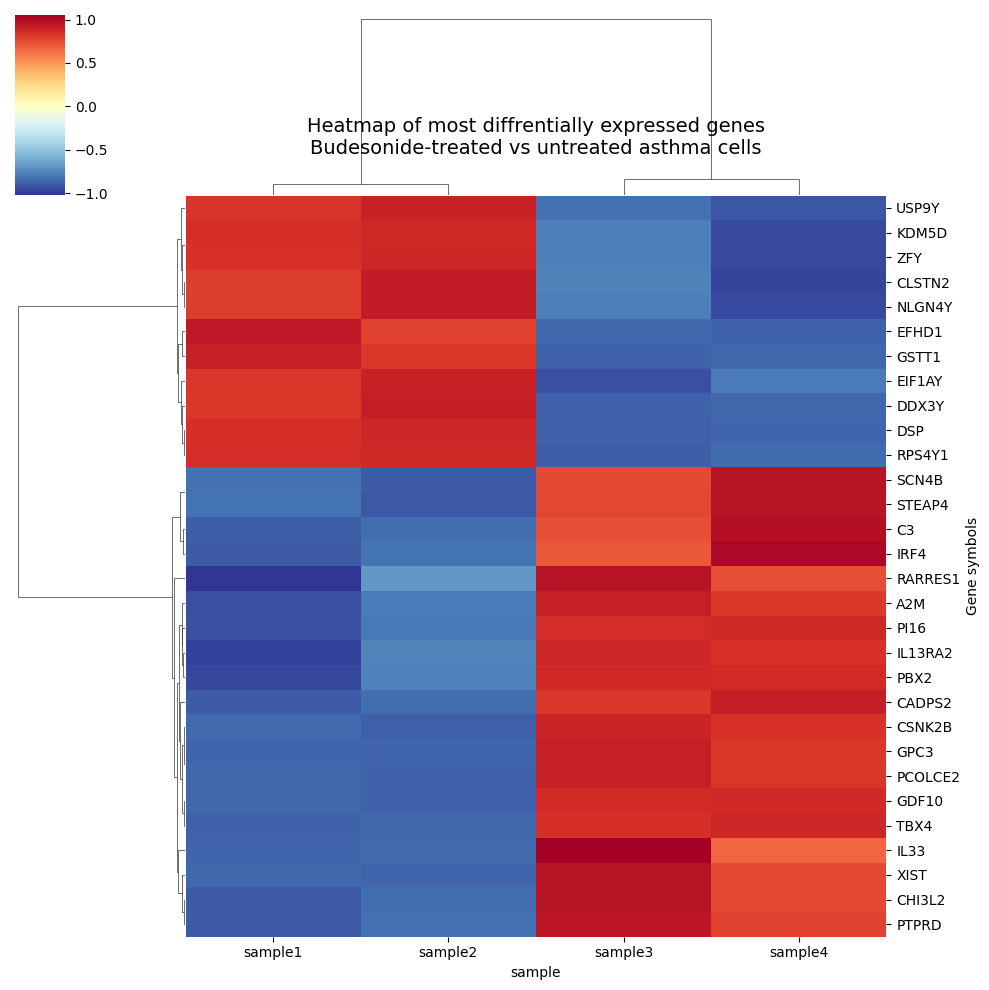

In [139]:
abs_sig = res[(abs(res["log2FoldChange"]) > 3) & (res["padj"] < 0.5)]
#up = res[(res["log2FoldChange"]) > 2 & (res["padj"] < 0.05)]
abs_sig = abs_sig.sort_values("padj").head(30)


dds.layers["log1p"] = np.log1p(dds.layers["normed_counts"])
dds_abs = dds[:, abs_sig.index]
grapher = pd.DataFrame(dds_abs.layers["log1p"].T, index=dds_abs.var_names, columns=dds_abs.obs_names)
id_to_symbol = abs_sig["Gene_Symbol"]   
#print(id_to_symbol) 
grapher.index = grapher.index.map(id_to_symbol)

grapher = grapher.dropna(axis=0)                 # remove genes with no symbol
grapher = grapher.groupby(grapher.index).mean()  # merge duplicate symbols safely
grapher = grapher.loc[grapher.std(axis=1) > 0]


print(abs_sig)

g = sns.clustermap(grapher, z_score=0, cmap= "RdYlBu_r")
g.ax_heatmap.set_title(
    "Heatmap of most diffrentially expressed genes\nBudesonide-treated vs untreated asthma cells",
    fontsize=14,
    pad=30
)

g.ax_heatmap.set_ylabel("Gene symbols")
g
